In [6]:
import numpy as np
import matplotlib.pyplot as plt

#True params
m_true = -0.9594
b_true = 4.294
f_true = 0.534
#synthetic data
N = 50
x = np.sort(10*np.random.rand(N))

yerr = 0.1+0.5*np.random.rand(N)

y = m_true*x+b_true
g = m_true*x+b_true

y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)



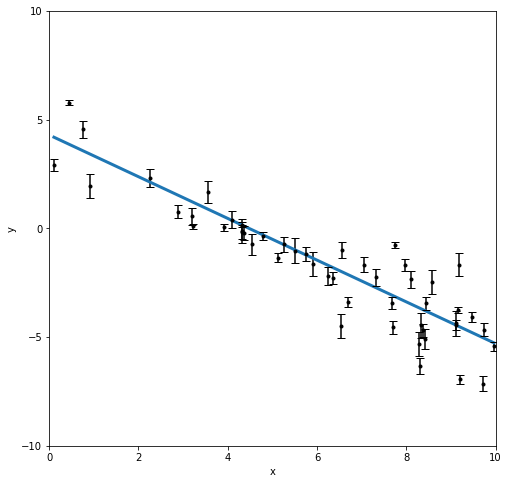

In [31]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3)
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);


In [45]:
A = np.vstack((np.ones_like(x), x)).T
print("A=",A)
C = np.diag(yerr * yerr)
print('C=',C)
cov= np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
print('cov =', cov)
#print('bov =', bov)
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

gnew = x*m_ls + b_ls


A= [[1.         0.1063094 ]
 [1.         0.45450907]
 [1.         0.76356874]
 [1.         0.90900215]
 [1.         2.26441779]
 [1.         2.88993093]
 [1.         3.1982981 ]
 [1.         3.21864848]
 [1.         3.55114435]
 [1.         3.9222859 ]
 [1.         4.08415688]
 [1.         4.30905284]
 [1.         4.31671189]
 [1.         4.32433347]
 [1.         4.36152461]
 [1.         4.55420664]
 [1.         4.79592082]
 [1.         5.1311849 ]
 [1.         5.26888631]
 [1.         5.50055619]
 [1.         5.75138824]
 [1.         5.91778362]
 [1.         6.25353107]
 [1.         6.36705078]
 [1.         6.54301434]
 [1.         6.56419407]
 [1.         6.6858542 ]
 [1.         7.0575882 ]
 [1.         7.320625  ]
 [1.         7.67043912]
 [1.         7.69437354]
 [1.         7.73820504]
 [1.         7.96950601]
 [1.         8.11144942]
 [1.         8.27348302]
 [1.         8.30217808]
 [1.         8.32871846]
 [1.         8.37221073]
 [1.         8.40809216]
 [1.         8.4321630

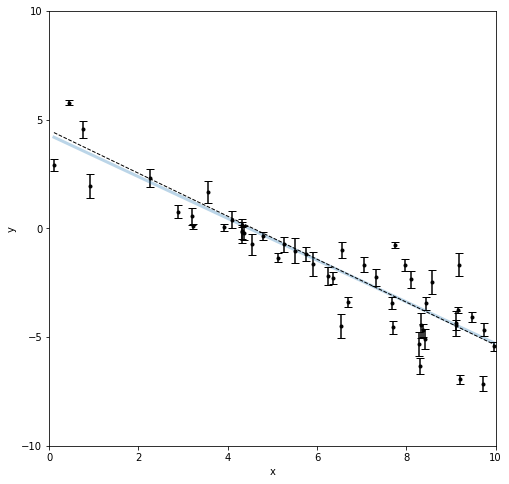

In [46]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3, alpha = 0.3)
plt.plot(x, gnew, linewidth=1, linestyle='--', color='k')
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [49]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

glikely = x*m_ml + b_ml;



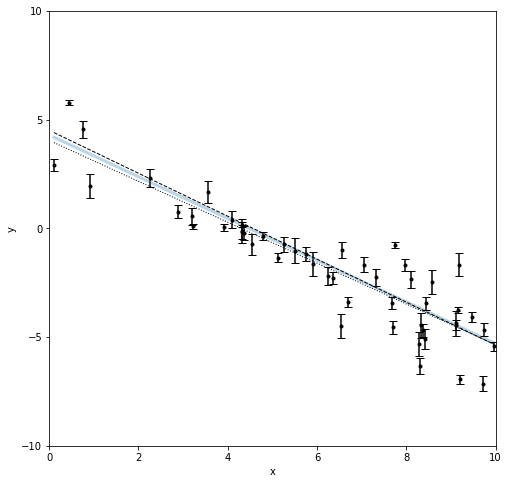

In [52]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3, alpha = 0.3)
plt.plot(x, gnew, linewidth=1, linestyle='--', color='k')
plt.plot(x, glikely, linewidth=1, linestyle=':', color='k')
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [53]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf


def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)



In [59]:
%time
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 500)


emcee: Exception while calling your likelihood function:
  params: [-0.93621939  4.04436034 -0.90504741]
  args: (array([0.1063094 , 0.45450907, 0.76356874, 0.90900215, 2.26441779,
       2.88993093, 3.1982981 , 3.21864848, 3.55114435, 3.9222859 ,
       4.08415688, 4.30905284, 4.31671189, 4.32433347, 4.36152461,
       4.55420664, 4.79592082, 5.1311849 , 5.26888631, 5.50055619,
       5.75138824, 5.91778362, 6.25353107, 6.36705078, 6.54301434,
       6.56419407, 6.6858542 , 7.0575882 , 7.320625  , 7.67043912,
       7.69437354, 7.73820504, 7.96950601, 8.11144942, 8.27348302,
       8.30217808, 8.32871846, 8.37221073, 8.40809216, 8.43216303,
       8.57384698, 9.10209658, 9.11371472, 9.14995688, 9.17191494,
       9.20838444, 9.48012239, 9.71087337, 9.73413312, 9.96467891]), array([ 2.91597565,  5.78093564,  4.55073868,  1.96548456,  2.29924595,
        0.75621417,  0.54860787,  0.10067094,  1.66414525,  0.03958637,
        0.39579444, -0.12250594, -0.16653733,  0.16715381, -0.20032237

Traceback (most recent call last):
  File "/home/s_matas/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-53-e2dbbe66a6e0>", line 12, in lnprob
    return lp + lnlike(theta, x, y, yerr)
  File "<ipython-input-49-4bcdf9ef8b55>", line 4, in lnlike
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
KeyboardInterrupt


KeyboardInterrupt: 